In [81]:
import numpy as np
import matplotlib.pyplot as plt

/Users/robvangastel/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  after removing the cwd from sys.path.


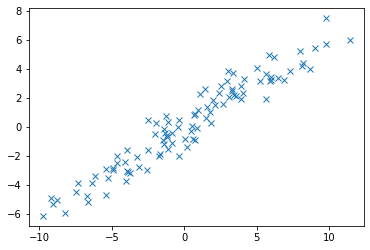

In [82]:
mean = [0, 0]
cov = [[1, 0], [30, 20]]  # diagonal covariance

D_x, D_y = np.random.multivariate_normal(mean, cov, 100).T

def plot(D_x, D_y):
    plt.plot(D_x, D_y, 'x')
    plt.axis('equal')
    plt.show()
    
plot(D_x, D_y)

<b>Example 1.5.</b> Consider a regression setting with $X=\mathbb{R}, \mathcal{Y}=\mathbb{R}$ and squared loss. Suppose we are considering prediction rules from the class
$$
\mathcal{F}=\{f: \mathbb{R} \rightarrow \mathbb{R}: f(x)=\beta x \quad \text { with } \beta \in \mathbb{R}\}
$$
If you would like you can think of this as a very simple neural-network (with a single linear neuron without a bias term). Let us say we have data $\left\{X_{i}, Y_{i}\right\}_{i=1}^{n}$ and use an algorithm $^{1}$ to learn of good model from $\mathcal{F}$ using data. In this case the solution has a very explicit form, namely
$$
\hat{f}_{n}(x)=x \underbrace{\frac{\sum_{i=1}^{n} X_{i} Y_{i}}{\sum_{i=1}^{n} X_{i}^{2}}}_{=\hat{\beta}_{n}}
$$

In [83]:
def beta_hat(D_x, D_y):
    nominator = 0
    denominator = 0
    for x, y in zip(D_x, D_y):
        nominator += x*y
        
    for x in D_x:
        denominator += x**2
    return nominator/denominator
        
beta = beta_hat(D_x, D_y)
beta

0.61602834861847

In [84]:
def f_n(beta, x_i):
    return beta * x_i

f_n(beta, D_x[0]), D_y[0]

(-0.8331288263898616, -0.4165635014587925)

<b>Definition 1.2 (Squared loss).</b> In regression or estimation problems the label space is generally the entire real line (or at least an interval of the real line), namely $y=\mathbb{R}$. The squared error loss function is often considered in such settings:
$$
\ell(\hat{y}, y)=(\hat{y}-y)^{2}
$$
This function is symmetric in the arguments, and has many practical and theoretical advantages - it is continuous, infinitely differentiable and convex on both arguments. It also provides a natural way to compare an estimate $\hat{y}$ with the true value $y$ that penalizes big differences between the two.

In [85]:
def squared_loss(y_hat, y):
    return ((y_hat - y)**2).mean(axis=0)

squared_loss(D_y+2, D_y) # Squared loss of 4, as expected

4.0

Estimating the risk and expected risk empirically (essentially using the law of large numbers).

<b>Definition 1.5 (Expected Risk).</b> The expected risk of a prediction rule is given by $\mathbb{E}\left[R\left(\hat{f}_{n}\right)\right] .$ Note that, the expectation is over the training data and any randomized choices of the learning algorithm. With heavy notational burden we
have
$$
\mathbb{E}\left[R\left(\hat{f}_{n}\right)\right]=\mathbb{E}\left[\ell\left(\hat{f}_{n}\left(X ; D_{n}\right), Y\right)\right]
$$
Where $(X, Y) \sim D$ and independent of $D_{n}=\left\{\left(X_{i}, Y_{i}\right)\right\}_{i=1}^{n} \stackrel{i . i . d}{\sim} D$.

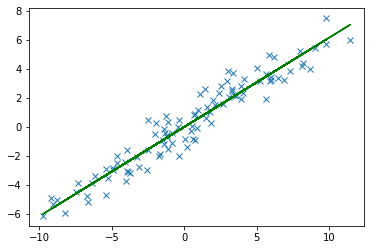

('Emperical loss', 0.7241405027802881)

In [87]:
y_hat = np.array([f_n(beta, x_i) for x_i in D_x])

plt.plot(D_x, D_y, 'x')
plt.plot(D_x, y_hat, '-g')
plt.axis('equal')
plt.show()
"Emperical loss", squared_loss(y_hat, D_y)

<b>Different distributions</b> for the given candidate models.

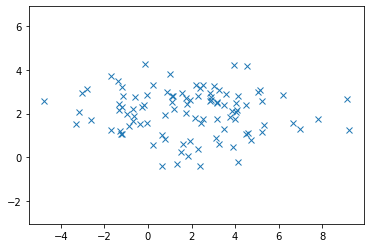

In [88]:
D_x, D_y = np.random.normal(2, 3, size=100), np.random.normal(2, 1, size=100)

plot(D_x, D_y)

In [89]:
beta = beta_hat(D_x, D_y)
y_hat = np.array([f_n(beta, x_i) for x_i in D_x])

"Emperical loss", squared_loss(y_hat, D_y), "beta: ", beta

('Emperical loss', 4.077492353070804, 'beta: ', 0.33870708207177896)

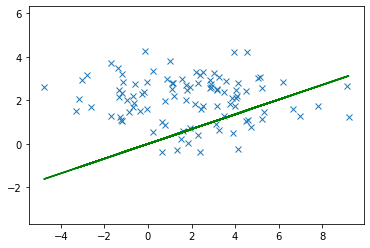

In [90]:
plt.plot(D_x, D_y, 'x')
plt.plot(D_x, y_hat, '-g')
plt.axis('equal')
plt.show()